## Medical Costs ML Anaysis

- Goal: 
The primary goal of this ML analysis is to build multiple ML models and compare their score when it comes to predicting the an individual medical costs billed by health insurance

- The work is broken down to: 
    * EDA 
    * ML Anaysis Prep
    * ML Anaysis 
    * Final Conclusion


#### EDA

In [2]:
#Import all the required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
#Read the data 
df = pd.read_csv("C:\\Users\\PZ4L6Q\\Documents\\Learnings\\Projects\\Project_2\\Data\\insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
#view the information about the data
##view if there is any null inputs and the types of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


#### Empty Rows Analysis 

In [5]:
#Replace any empty filling with NaN so they can be dropped after. Then, view the total  # rows prior to dropping the empties
for x in df: 
    df[x] = df[x].replace(r'^\s*$', np.nan, regex=True)

print(len(df))

1338


In [6]:
df = df.dropna() 
print(len(df)) 

1338


In [139]:
#CONCLUSION: 
#There was no empty rows 

View The Unique inputs per categorical column

In [7]:
#View the inputs of the Non-Int columns  --> sex column
print(df['sex'].unique()) 

['female' 'male']


In [8]:
#View the inputs of the Non-Int columns  --> smoker column
print(df['smoker'].unique()) 

['yes' 'no']


In [9]:
#View the inputs of the Non-Int columns  --> region column
print(df['region'].unique()) 

['southwest' 'southeast' 'northwest' 'northeast']


#### Mathematical Conclusions 

In [143]:
#1.3.1 
#View the value counts per categorical column 
for x in df[['sex', 'smoker', 'region', 'children']]: 
    y = df[x].value_counts()
    print(y)


male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [144]:
#Conclusion: 
#The Sex and Region columns seem to be balanced. However, the smoker column is not balanced

In [145]:
#1.3.2
#View the decribtion  per continous column 
for x in df[['age', 'bmi']]: 
    y = df[x].describe()
    print(y)

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [146]:
#Conclusion: 
#For the age column: The avergae age is 39 years. The max and min ages are 64 and 18
#For the bmi column: The average bmi is 30.6. The max and min bmi are 53.13 and 15.96
#For the childern column: The averga enumber of childern is 1. The max and min number of childern  are 5 and 1

In [147]:
#1.3.3
#View the correlation of the "Numerical"  columns with the "Label"  column 
correlation = df.corrwith(df['charges']).sort_values(ascending=True)
print(correlation[:-1])


children    0.067998
bmi         0.198341
age         0.299008
dtype: float64


In [148]:
#Conclusion: 
#The highest correlation between the numerical columns and the "Charges" column is 29.9 for the age column, then, 19.8% for the bmi column, and 6.7% for the childern column

#### Data Visualization 

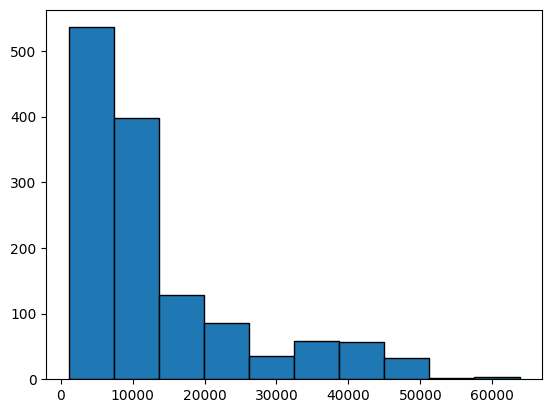

In [149]:
#1.4.1 
#View the balance of the 'Label' data 
# ax = sns.countplot(x='children', data=df)
# ax.bar_label(ax.containers[0])
# plt.show()
plt.hist(x= df['charges'],  histtype ='bar', bins = 10, edgecolor='black')
plt.show()

In [150]:
#Conclusion: 
#Majoirty of the costs are below 200K USD 

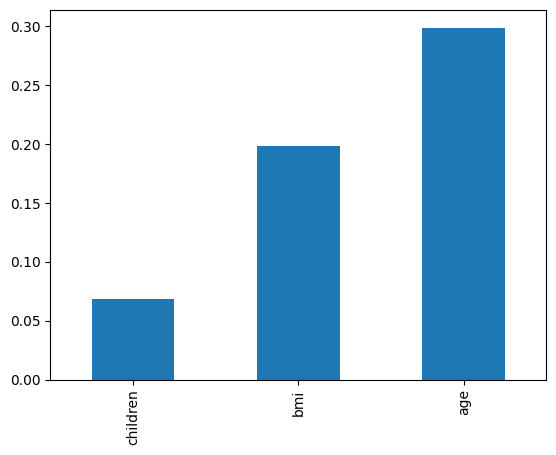

In [151]:
#1.4.2
#Create a correlation plot between 'Label' & all the 'Numerical' columns. 
df.corrwith(df['charges']).sort_values(ascending=True)[:-1].plot(kind='bar')
plt.show()


In [152]:
#Conclusion
#The highest correlation between the numerical columns and the "Charges" column is 29.9 for the age column, then, 19.8% for the bmi column, and 6.7% for the childern column


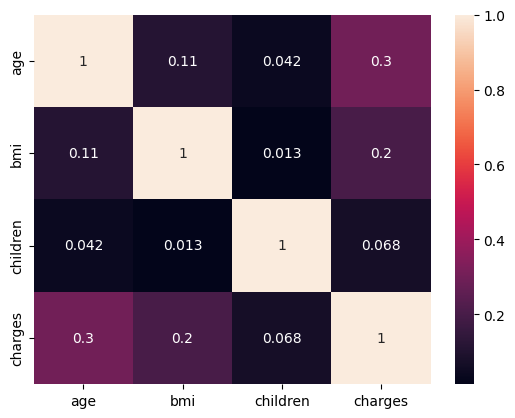

In [153]:
#1.4.3
#Create a heatmap of the correlations between all features. 
sns.heatmap(df.corr(), annot=True)
plt.show()

In [154]:
#Conclusion
#The "age" column's highest correlation is with the "charges" column at 30%
#The "bim" column's highest correlation is with the "charges" column at 20%
#The "childern" column's highest correlation is with the "charges" column at 6.8% and the "age" column at 4.25


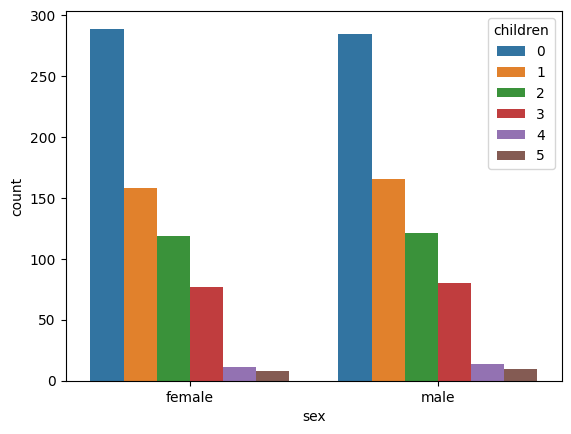

In [155]:
#1.4.4 View the relationship between the "sex" column and the number of "childern" column
sns.countplot(data=df, x= 'sex', hue='children')
plt.show()


In [156]:
#Conclusion
#Both males and females have a balanced # of children
#The most number of childern is 0 and the lowest number of childern is 5

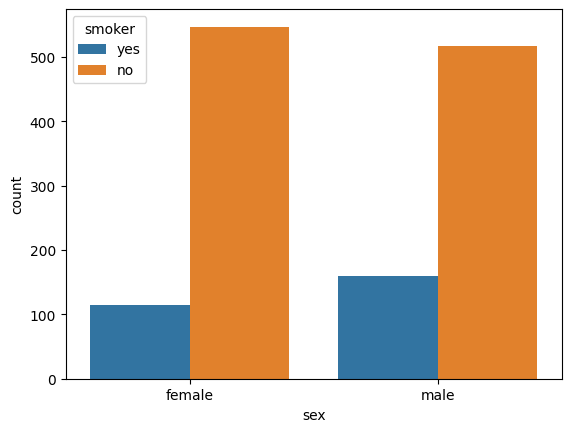

In [157]:
#1.4.5 View the relationship between the "sex" column and the  of "smoker" column
sns.countplot(data=df, x= 'sex', hue='smoker')
plt.show()

In [158]:
#Conclusion
#Both males and females have a balanced degree of smoking


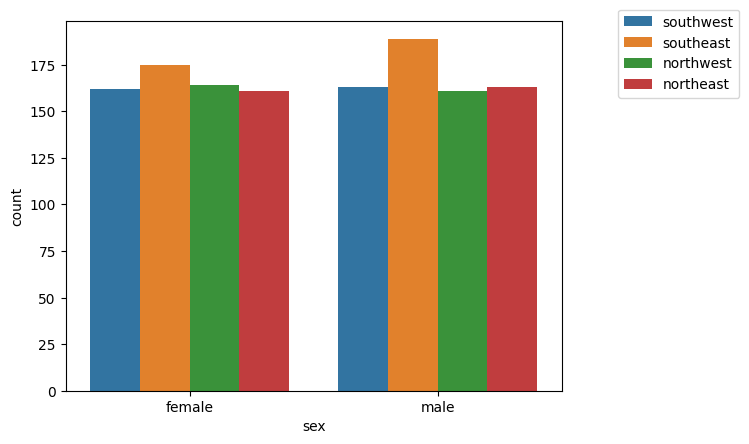

In [159]:
#1.4.6 View the relationship between the "sex" column and the  of "region" column
sns.countplot(data=df, x= 'sex', hue='region')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

In [160]:
#Conclusion
#Both males and females have a balanced regions of living

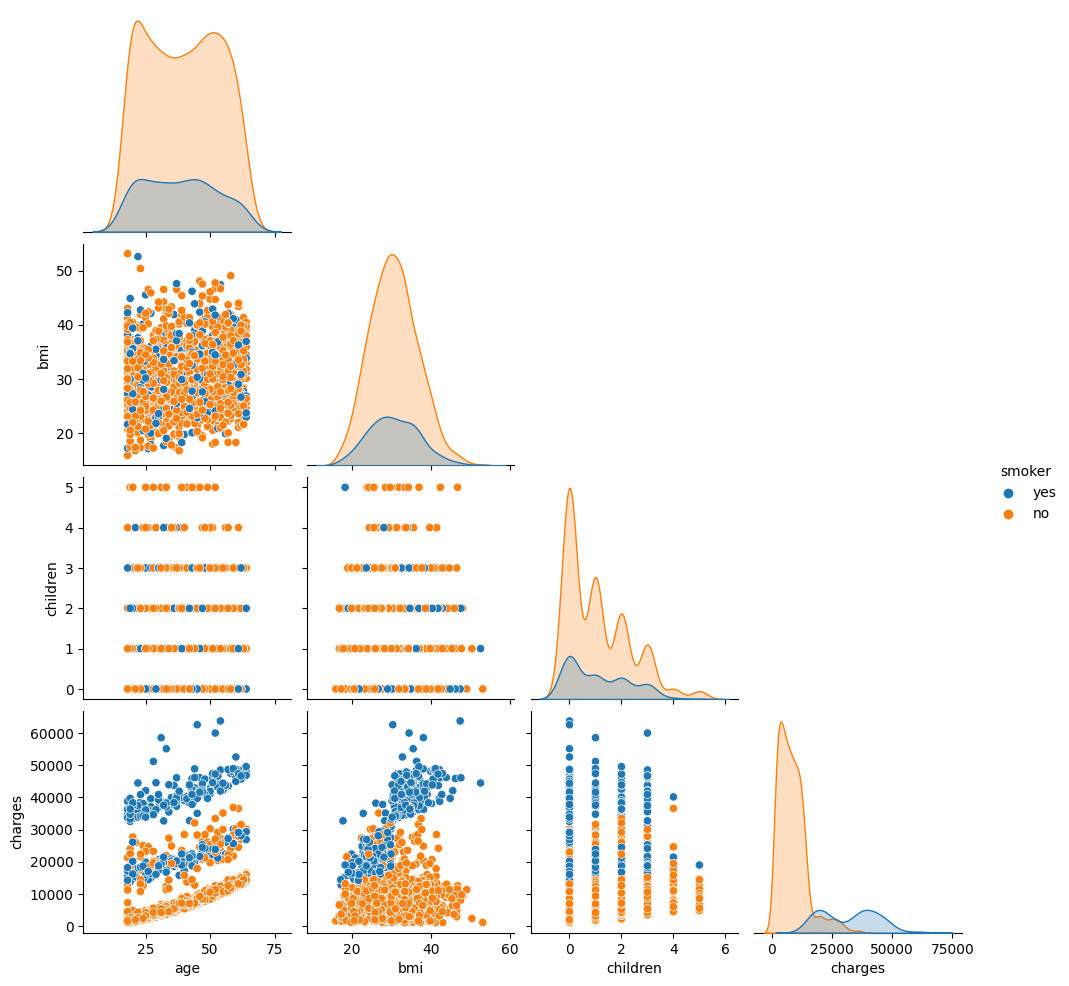

In [161]:
#1.4.7 Pairplot when the smoker is a hue
sns.pairplot(data=df, corner=True, hue='smoker')
plt.show()

In [162]:
#Conclusions 

##With increasing the "age" the "charges" seem to increase
##Changes increase with the smokers  
##The distrubtion of age seem t be similar between all the ages 
##Non-smokers seem to have more childern 


## ML Analysis Prep

##### Categorize the data into features and label column

In [10]:
#Categirze the data into a features set & a label column

##Add the 'Label' to a new DataFrame 
y_label_main =  df[['charges']].copy()
print(y_label_main)

##Create a Numerical DataFrame (Won't experince OHE) & A Categorical DataFrame (Will experince OHE)
X_Numerical = df[['age', 'bmi']].copy()
print(X_Numerical)

X_Categorical = df[['sex', 'children','smoker','region']].copy()
print(X_Categorical)

          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]
      age     bmi
0      19  27.900
1      18  33.770
2      28  33.000
3      33  22.705
4      32  28.880
...   ...     ...
1333   50  30.970
1334   18  31.920
1335   18  36.850
1336   21  25.800
1337   61  29.070

[1338 rows x 2 columns]
         sex  children smoker     region
0     female         0    yes  southwest
1       male         1     no  southeast
2       male         3     no  southeast
3       male         0     no  northwest
4       male         0     no  northwest
...      ...       ...    ...        ...
1333    male         3     no  northwest
1334  female         0     no  northeast
1335  female         0     no  southeast
1336  female         0     no  southwest
1337  female         0    yes  northwest

[1338 rows x 4 columns]


In [11]:
###Perfrom the OHE on the Categorical DataFrame
from sklearn.preprocessing import OneHotEncoder


##Creating an instance of OneHotEncoder()
encoder_object = OneHotEncoder() 


##Fit to data, then transform it.
Fitted_Data = encoder_object.fit_transform(X_Categorical)

##Add Column Names
column_name = encoder_object.get_feature_names_out(X_Categorical.columns)

##DataFrame from a scipy sparse matrix.
    ###scipt sparse matrix is a matrix only filled in the locations it is suppose too
    ##A sparse matrix is a matrix in which most of the elements have zero value and thus efficient ways of storing such matrices are required.
X_Categorical = pd.DataFrame.sparse.from_spmatrix(Fitted_Data, columns=column_name)

##Adding a column to merge on for both DataFrames. Otherwise you will be left with Nan if the regular concat method is used
X_Categorical['index'] = range(1, len(X_Categorical) + 1)
X_Numerical['index'] = range(1, len(X_Numerical) + 1)


##Merging the DataFrames
X_features_main = X_Categorical.merge(X_Numerical, on = 'index', how = 'left')

###Dropping the index Column 
X_features_main = X_features_main.drop(['index'], axis=1)

In [12]:
print(X_features_main)


      sex_female  sex_male  children_0  children_1  children_2  children_3  \
0            1.0       0.0         1.0         0.0         0.0         0.0   
1            0.0       1.0         0.0         1.0         0.0         0.0   
2            0.0       1.0         0.0         0.0         0.0         1.0   
3            0.0       1.0         1.0         0.0         0.0         0.0   
4            0.0       1.0         1.0         0.0         0.0         0.0   
...          ...       ...         ...         ...         ...         ...   
1333         0.0       1.0         0.0         0.0         0.0         1.0   
1334         1.0       0.0         1.0         0.0         0.0         0.0   
1335         1.0       0.0         1.0         0.0         0.0         0.0   
1336         1.0       0.0         1.0         0.0         0.0         0.0   
1337         1.0       0.0         1.0         0.0         0.0         0.0   

      children_4  children_5  smoker_no  smoker_yes  region_nor

In [13]:
print(X_features_main.columns)


Index(['sex_female', 'sex_male', 'children_0', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age', 'bmi'],
      dtype='object')


#### Splitting the Data

In [14]:
#Spliting the data into training set and a test set
#-The data is split into a training and a testing set ONLY. Commonly we split the data into a training set, a testing set, and a validation set. However, this approach  was followed in this project, because of the following: 
#    -Cross validation is used to for the training and the testing of the data. Then, a final validation set (called test_validation set) is used for validating the score of the model 
#    -If cross validation was not used &: 
#        -The model's hyperparamters were tuned using the testing set. Then, a seperate validation  set will be required to evaluate the true score of the model. However when using GridSearchCV we the validation is not invovled  

In [15]:
###Split the data into Training / Holdset 
from sklearn.model_selection import train_test_split
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X_features_main, y_label_main, test_size=0.3, random_state=101) #tuple and packing


#### Scaling the Data

In [16]:
import warnings
warnings.filterwarnings('ignore')
print(X_train.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
    ###Scaler must be fitted to find the mean & standard deviation 
    ###This will use the X_train to train the model to scale all of its data to a similar range 
    ###We must use the training set not the test set to avoid dataleakage 
X_train = scaler.transform(X_train)  #Scale the training set using the "scale" varilable. Overwrite the original X-train set
X_test_validation = scaler.transform(X_test_validation) #Scale the test_validation set using the "scale" varilable. 


Index(['sex_female', 'sex_male', 'children_0', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age', 'bmi'],
      dtype='object')


In [320]:
#Metric Selection
print(df['charges'].describe())

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [192]:
#The mean of the Label column is 13270
#The RMSE should be under 10%, which is around 1327 of the mean value of the label column for an algoirhtm to be considered effective

#### ML Analysis

- Build each ML model, evaulte the model aganist the test set / adjust the hyperparamters, evaluate the model aganist the holdout set and make a final conclusion about the model

- ML Models built are: 
    * Linear Regression
    * Polynomial Regression
    * KNN 
    * SVM (SVR)
    * Decision Trees (With Boosting)
    * Random Forest

#### Linear Regression 

- Notes: 
    - The main hyperparameters we will be anayzing are the alpha and the l1_ratio, which are part of the regularization we apply to increase the bias of the model to avoid overfitting
    - The alpha paramter is the constant lambda that is a plenty paramter and it multiple by the reguarization to indicates its impact 
    - When L1_ratio is the ratio paramter. l1_ratio = 0. Then, this represents L2 penalty (Ridge Regularization) 
    - When L1_ratio is the ratio paramter. l1_ratio = 1. Then, this represents L1 penalty (Lasso Regularization) 


#### Linear Regression Cross Validation RMSE

In [17]:
from sklearn.linear_model import ElasticNet
ml_model = ElasticNet()
prarm_grid = {'alpha' :[0.25, 0.5, 1,5, 10,100] , 'l1_ratio' : [0,0.1, 0.25, 0.5, 0.75,0.9, 0.99, 1], 'max_iter' : [1000, 5000] }

#The Regularizationused to increase the bias and decrease chances of overfittng
#The alpha paramter is the constant lambda that is a plenty paramter and it multiple by the reguarization to indicates its impact
#When L1_ratio is the ratio paramter. l1_ratio = 0. Then, this represents L2 penalty (Ridge Regularization) 
#When L1_ratio is the ratio paramter. l1_ratio = 1. Then, this represents L1 penalty (Lasso Regularization) 

from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator=ml_model,param_grid=prarm_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)

grid_model.fit(X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", grid_model.best_params_) 
print("The RMSE is :",grid_model.best_score_) 


Tuned Hyperparameters : {'alpha': 100, 'l1_ratio': 1, 'max_iter': 1000}
The RMSE is : -6209.539187774208


In [68]:
#RMSE = 6207.321
# The mean  of the Label column is 13270
print('When utilizing GridSearchCV: ')
print("The following were the optimum hyperparameters for Linear Regression: {'alpha': 100, 'l1_ratio': 1, 'max_iter': 1000 ') ")
print('Based on the produced hyperparameters the RMSE is 6207. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(6207/13270)),'%')


When utilizing GridSearchCV: 
The following were the optimum hyperparameters for Linear Regression: {'alpha': 100, 'l1_ratio': 1, 'max_iter': 1000 ') 
Based on the produced hyperparameters the RMSE is 6207. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  46.77467972871138 %


#### Linear Regression Main Model RMSE & Conclusions

In [57]:
from sklearn.linear_model import ElasticNet
ml_model = ElasticNet()
from sklearn.metrics import mean_squared_error
import math
ml_model = ElasticNet(alpha=10, l1_ratio=1, max_iter=1000)
ml_model.fit(X_train,y_train ) #fitting the model to the X and y trained data

y_predicted = ml_model.predict(X_test_validation) #view the predicted results from the fitted model by predicting the X Test (X_validation)

MSE = mean_squared_error(y_test_validation, y_predicted) #RMSE (i.d., RMSE can be viewed as the standard deviation of prediction, how off the predicitions are)
RMSE = math.sqrt(MSE)
print('The RMSE after fitting the test data is ', RMSE )        



The RMSE after fitting the test data is  5811.889164784503


In [67]:
#RMSE = 5811
#The mean  of the Label column is 13270
print('When evaluating the model against the testing dataset')
print("The following were the optimum hyperparameters for Linear Regression: {'alpha': 100, 'l1_ratio': 1, 'max_iter': 1000 ') ")
print('Based on the produced hyperparameters the RMSE is 5811. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(5811/13270)),'%')


When evaluating the model against the testing dataset
The following were the optimum hyperparameters for Linear Regression: {'alpha': 100, 'l1_ratio': 1, 'max_iter': 1000 ') 
Based on the produced hyperparameters the RMSE is 5811. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  43.79050489826677 %


#### Polynomial Regression 

- Notes: 
    - Working with polynomial regression requires us to: Find the optimium polynomial degree, split the dataset into training/testing (while considering the polynomial degree), sclae the data, and perfrom the ML analysis
    - Similar to Linear regression of Degree = 1. The main hyperparameters we will be anayzing are the alpha and the l1_ratio, which are part of the regularization we apply to increase the bias of the model to avoid overfitting
    - The alpha paramter is the constant lambda that is a plenty paramter and it multiple by the reguarization to indicates its impact 
    - When L1_ratio is the ratio paramter. l1_ratio = 0. Then, this represents L2 penalty (Ridge Regularization) 
    - When L1_ratio is the ratio paramter. l1_ratio = 1. Then, this represents L1 penalty (Lasso Regularization) 

#### Polynomial Regression ML Model Prep

In [303]:
#Unlike other ML models Linear Regression With a Polynomial Degree requires selecting the degree prior to splitting the data into trainig and testing set. 
#The below is a step to ensure we select the degree that does not result in overfitting the data. 1-6 degrees will be tested in a loop 
from sklearn.preprocessing import  PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

train_rmse_erros = [] #List in which trained errors will be stored 
test_rmse_errors = [] #List in which test errors will be stored 

###Create a loop of multiple models of the various polynomial degrees 
for degree in range(1,6):
    ###Create the different order polynomials 
    polynomial_converter_forloop = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False) 
    polynomial_converter_forloop.fit(X_features_main) #This line tells PolynomialFeatures what is the data that we need to transform 
    X_features_main_processed = polynomial_converter_forloop.transform(X_features_main) #This line tells PolynomialFeatures to transform the data 

    ###Split the polynomial features into training set / test set 
    X_train, X_test, y_train, y_test = train_test_split(X_features_main_processed, y_label_main, test_size=0.3, random_state=101) #tuple and packing

    ###Fit & Train these models in a basic linear regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train) #fit the model on only the trained data. This is training the model on 9 features instead of three

    ###4.1.5 Pass in the train & test set to see what the model will predict 
    y_predicted_from_X_train = poly_model.predict(X_train) #The model never seen "X_train" 
    y_predicted_from_X_test = poly_model.predict(X_test) #The model never seen "X_test" 

    ###Calculate for the error for the training set and for the test set. It may be any error evaluation type but for this type of models pass RMSE
    MSE_train = mean_squared_error(y_train,y_predicted_from_X_train)
    RMSE_train = math.sqrt(MSE_train)

    MSE_test = mean_squared_error(y_test,y_predicted_from_X_test)
    RMSE_test = math.sqrt(MSE_test)


    ###Store the RMSE results into empty lists for the comparision
    train_rmse_erros.append(RMSE_train)
    test_rmse_errors.append(RMSE_test)

print(train_rmse_erros)
print(test_rmse_errors)

[6149.889111429991, 4660.888875786905, 4291.157328201716, 3752.738636124446, 2880.6968078666237]
[5811.978832679245, 4859.196119866638, 13805037683.236341, 8059.80268209773, 739701.7858544264]


In [59]:
print('Based on the elbow method from the results of the above loop the best polynomial degree is: 2')
print('When D=1 the RSME is higher than that of D=2')
print('When D=3 the RSME of the testing set is much higher than that of the training set indicating a clear overftiing')

Based on the elbow method from the results of the above loop the best polynomial degree is: 2
When D=1 the RSME is higher than that of D=2
When D=3 the RSME of the testing set is much higher than that of the training set indicating a clear overftiing


In [307]:
#Fit the polynomial & Transofrm it
from sklearn.preprocessing import  PolynomialFeatures #Focus on the PolynomialFeatures library, because we are working with a polynomial regression
polynomial_converter = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False) 
polynomial_converter.fit(X_features_main) #This line tells PolynomialFeatures what is the data that we need to transform 
X_features_main_polynomial = polynomial_converter.transform(X_features_main) #This line tells PolynomialFeatures to transform the data, in case degree > 1

In [308]:
# Create a Train/Test data
from sklearn.model_selection import train_test_split
X_train_polynomial, X_test_polynomial, y_train_polynomial, y_test_polynomial = train_test_split(X_features_main_polynomial, y_label_main, test_size=0.30, random_state=101) #tuple and packing

In [309]:
#Scale the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_polynomial) 

X_train_polynomial = scaler.transform(X_train_polynomial)  #Scale the training set using the "scale" varilable. Overwrite the original X-train set
X_test_polynomial = scaler.transform(X_test_polynomial) #Scale the test set using the "scale" varilable. Overwrite the original X-train set


#### Polynomial Regression Cross Validation RMSE

In [310]:
from sklearn.linear_model import ElasticNet
ml_model_poly = ElasticNet()
prarm_grid = {'alpha' :[0.25, 0.5, 1,5, 10,100] , 'l1_ratio' : [0,0.1, 0.25, 0.5, 0.75,0.9, 0.99, 1], 'max_iter' : [1000, 5000] }

#The Regularizationused to increase the bias and decrease chances of overfittng
#The alpha paramter is the constant lambda that is a plenty paramter and it multiple by the reguarization to indicates its impact
#When L1_ratio is the ratio paramter. l1_ratio = 0. Then, this represents L2 penalty (Ridge Regularization) 
#When L1_ratio is the ratio paramter. l1_ratio = 1. Then, this represents L1 penalty (Lasso Regularization) 

from sklearn.model_selection import GridSearchCV
grid_model_poly = GridSearchCV(estimator=ml_model_poly,param_grid=prarm_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)

grid_model_poly.fit(X_train_polynomial,y_train_polynomial ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", grid_model_poly.best_params_) # {'alpha': 10, 'l1_ratio': 1, 'max_iter': 1000}
print("The RMSE is :",grid_model_poly.best_score_) #-5018.676251385308

Tuned Hyperparameters : {'alpha': 10, 'l1_ratio': 1, 'max_iter': 1000}
The RMSE is : -5018.676251385308


In [66]:
#RMSE = 5018
# The mean  of the Label column is 13270
print('When utilizing GridSearchCV: ')
print("The following were the optimum hyperparameters for Polynomial Regression: {'alpha': 10, 'l1_ratio': 1, 'max_iter': 1000} ")
print('Based on the produced hyperparameters the RMSE is 5018. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(5018/13270)),'%')



When utilizing GridSearchCV: 
The following were the optimum hyperparameters for Polynomial Regression: {'alpha': 10, 'l1_ratio': 1, 'max_iter': 1000} 
Based on the produced hyperparameters the RMSE is 5018. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  37.814619442351166 %


#### Polynomial Regression Main Model RMSE & Conclusions

In [314]:
from sklearn.linear_model import ElasticNet
ml_model = ElasticNet()
from sklearn.metrics import mean_squared_error
import math
ml_model_poly = ElasticNet(alpha=10, l1_ratio=1, max_iter=1000)
ml_model_poly.fit(X_train_polynomial,y_train_polynomial ) #fitting the model to the X and y trained data

y_predicted = ml_model_poly.predict(X_test_polynomial) #view the predicted results from the fitted model by predicting the X Test (X_validation)

MSE = mean_squared_error(y_test_validation, y_predicted) #RMSE (i.d., RMSE can be viewed as the standard deviation of prediction, how off the predicitions are)
RMSE = math.sqrt(MSE)
print('The RMSE after fitting the test data is ', RMSE )        


The RMSE after fitting the test data is  4777.039961549921


In [82]:
#RMSE = 4777
#The mean  of the Label column is 13270
print('When evaluating the model against the testing dataset')
print("The following were the optimum hyperparameters for Polynomial Regression: {'alpha': 100, 'l1_ratio': 1, 'max_iter': 1000 ') ")
print('Based on the produced hyperparameters the RMSE is 4777. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(4777/13270)),'%' )


When evaluating the model against the testing dataset
The following were the optimum hyperparameters for Polynomial Regression: {'alpha': 100, 'l1_ratio': 1, 'max_iter': 1000 ') 
Based on the produced hyperparameters the RMSE is 4777. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  35.99849284099472 %


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### KNN Regression 

- Notes: 
    - The main hyperparameters we will be analyzing are n_neighbors, weights, algorithm, and p value
    - n_neighbors, is the number of data points that the algorithm will pick to decide on the value of our to be predicted output
    - weights,this parameter allows us to treat data unequally when 'distance' is select. 
        - If "Distance" is selected then the algorithm will weigh the points by the inverse of their distance. Therefore closer neighbors to the undecided point, will have a greater influence than neighbors which are further away. 
        - If 'Uniform' is selected the no weights to the neighbors will be added Therefore closer neighbors to the undecided point, will not influence than neighbors which are further away and vice versa 
    - algorithm, This is what is used to split the data to choose. Not to calculate their distances. This is the splitting criteria.
    - p value, is related to the distance metric of Minkowski. When, p=1 distances will be calculated based on the Manhattan method and when p=2 distances will be calculated based on the standard euclidean method

#### KNN Regression Cross Validation RMSE

In [347]:
from sklearn.neighbors import KNeighborsRegressor
ml_model_knn = KNeighborsRegressor()
prarm_grid = {'n_neighbors' : np.arange(1,30,4),'weights': ['uniform', 'distance'],'algorithm':['ball_tree', 'kd_tree', 'brute'],'p':[1, 2] }

from sklearn.model_selection import GridSearchCV
grid_model_knn = GridSearchCV(estimator=ml_model_knn,param_grid=prarm_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)

grid_model_knn.fit(X_train,y_train ) #fitting the model to the X and y trained data


print("Tuned Hyperparameters :", grid_model_knn.best_params_) # {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
print("The RMSE is :",grid_model_knn.best_score_) #  -8316.9496805438

Tuned Hyperparameters : {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
The RMSE is : -8316.9496805438


In [69]:
#RMSE = 8316
# The mean  of the Label column is 13270
print('When utilizing GridSearchCV: ')
print("The following were the optimum hyperparameters for KNN Regressor:  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'} ")
print('Based on the produced hyperparameters the RMSE is 8316. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(8316/13270)),'%')

When utilizing GridSearchCV: 
The following were the optimum hyperparameters for KNN Regressor:  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'} 
Based on the produced hyperparameters the RMSE is 8316. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  62.66767143933685 %


#### KNN Regression Main Model RMSE & Conclusions

In [349]:
from sklearn.neighbors import KNeighborsRegressor
ml_model_knn = KNeighborsRegressor(algorithm = 'kd_tree',n_neighbors = 9, p=1, weights = 'distance' )
ml_model_knn.fit(X_train,y_train ) #fitting the model to the X and y trained data

y_predicted = ml_model_knn.predict(X_test_validation) #view the predicted results from the fitted model by predicting the X Test (X_validation)

MSE = mean_squared_error(y_test_validation, y_predicted) #RMSE (i.d., RMSE can be viewed as the standard deviation of prediction, how off the predicitions are)
RMSE = math.sqrt(MSE)
print('The RMSE after fitting the test data is ', RMSE ) 


The RMSE after fitting the test data is  8710.17796319315


In [70]:
#RMSE = 8710
#The mean  of the Label column is 13270
print('When evaluating the model against the testing dataset')
print("The following were the optimum hyperparameters for KNN Regressor: {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'} ")
print('Based on the produced hyperparameters the RMSE is 8710. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(8710/13270)),'%' )

When evaluating the model against the testing dataset
The following were the optimum hyperparameters for KNN Regressor: {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'} 
Based on the produced hyperparameters the RMSE is 8710. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  65.63677467972872 %


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### SVM-SVR  

- Notes: 
    - The main hyperparameters we will be analyzing are kernel, C, epsilon, gamma, and degree
    - kernel, It is a method used to take data as input and transform it into the required form of processing data.Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transform to a linear equation in a higher number of dimension spaces. 
    - C, increasing the values of C means we allow for less regularization and risk overfitting and vice versa 
    - epsilon, This is percentage of allowable error, when it is high it means we allow for too much error and the model is useless and when it is very low (e.g., 0) we will risk overfitting the data
    - degree, this parameter is associated with the 'poly' kernel 

#### SVM-SVR Cross Validation RMSE

In [24]:
from sklearn.svm import SVR
ml_model_knn = SVR()
###Import the GridSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
parameters = {'kernel' : ['rbf','poly','linear'],'C': [ 0.01,0.1,1,10,100],'epsilon':[0.05,0.1,0.2,0.3,0.4,0.5] ,'gamma':['scale', 'auto']  ,'degree'  : [1,2,3,4]} #Theses paramters we tune

grid_model_svr = GridSearchCV(ml_model_knn, param_grid = parameters, scoring='neg_root_mean_squared_error', cv=10 , n_jobs=-1)                     
grid_model_svr.fit(X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", grid_model_svr.best_params_) #-> {'C': 100, 'degree': 1, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'linear'}
print("neg_root_mean_squared_error :",grid_model_svr.best_score_) #With GridsearchCV the neg_root_mean_squared_error is 7558.68963302703

Tuned Hyperparameters : {'C': 100, 'degree': 1, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'linear'}
neg_root_mean_squared_error : -7558.68963302703


In [71]:
#RMSE = 7558
# The mean  of the Label column is 13270
print('When utilizing GridSearchCV: ')
print("The following were the optimum hyperparameters for SVM-SVR :  {'C': 100, 'degree': 1, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'linear'} ")
print('Based on the produced hyperparameters the RMSE is 7558. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(7558/13270)),'%')

When utilizing GridSearchCV: 
The following were the optimum hyperparameters for SVM-SVR :  {'C': 100, 'degree': 1, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'linear'} 
Based on the produced hyperparameters the RMSE is 7558. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  56.95553880934439 %


#### SVM-SVR Main Model RMSE & Conclusions

In [27]:
from sklearn.svm import SVR
ml_model_svr = SVR(C=100, degree=1, epsilon = 0.3, gamma ='scale', kernel = 'linear')
ml_model_svr.fit(X_train,y_train ) #fitting the model to the X and y trained data

y_predicted = ml_model_svr.predict(X_test_validation) #view the predicted results from the fitted model by predicting the X Test (X_validation)

MSE = mean_squared_error(y_test_validation, y_predicted) #RMSE (i.d., RMSE can be viewed as the standard deviation of prediction, how off the predicitions are)
RMSE = math.sqrt(MSE)
print('The RMSE after fitting the test data is ', RMSE ) 


The RMSE after fitting the test data is  7130.247699233557


In [72]:
#RMSE = 7130
#The mean  of the Label column is 13270
print('When evaluating the model against the testing dataset')
print("The following were the optimum hyperparameters for SVM-SVR: {'C': 100, 'degree': 1, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'linear'} ")
print('Based on the produced hyperparameters the RMSE is 7130. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(7130/13270)),'%' )

When evaluating the model against the testing dataset
The following were the optimum hyperparameters for SVM-SVR: {'C': 100, 'degree': 1, 'epsilon': 0.3, 'gamma': 'scale', 'kernel': 'linear'} 
Based on the produced hyperparameters the RMSE is 7130. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  53.730218538055766 %


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Decision Tree (Ada Boost) Regression 

- Notes: 
    - The main hyperparameters we will be analyzing are n_estimators, and the learning_rate
    - n_estimators, is the number of trees in the decision trees algorithm 
    - learning_rate, is the influence of each tree. The higher the value the higher the influence and vice versa. 

#### Decision Tree (Ada Boost) Cross Validation RMSE

In [34]:
from sklearn.ensemble import AdaBoostRegressor
ml_model_adaboost = AdaBoostRegressor()

prarm_grid = {'n_estimators' : [10,50,100, 200], 'learning_rate':[0.0001, 0.001 , 0.01, 0.1, 1] }


from sklearn.model_selection import GridSearchCV
grid_model_adaboost = GridSearchCV(ml_model_adaboost,param_grid=prarm_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
grid_model_adaboost.fit(X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", grid_model_adaboost.best_params_) #  {'learning_rate': 0.001, 'n_estimators': 50}
print("The RMSE is :",grid_model_adaboost.best_score_) #  -4626.4858433128

Tuned Hyperparameters : {'learning_rate': 0.001, 'n_estimators': 50}
The RMSE is : -4626.48584331286


In [73]:
#RMSE = 4626
# The mean  of the Label column is 13270
print('When utilizing GridSearchCV: ')
print("The following were the optimum hyperparameters for AdaBoostRegressor :  {'learning_rate': 0.001, 'n_estimators': 50} ")
print('Based on the produced hyperparameters the RMSE is 4626. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(4626/13270)),'%')


When utilizing GridSearchCV: 
The following were the optimum hyperparameters for AdaBoostRegressor :  {'learning_rate': 0.001, 'n_estimators': 50} 
Based on the produced hyperparameters the RMSE is 4626. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  34.86058779201206 %


#### Decision Tree (Ada Boost) Regression Main Model RMSE & Conclusions

In [36]:
from sklearn.ensemble import AdaBoostRegressor
ml_model_adaboost = AdaBoostRegressor(learning_rate = 0.001, n_estimators=50)

ml_model_adaboost.fit(X_train,y_train ) #fitting the model to the X and y trained data

y_predicted = ml_model_adaboost.predict(X_test_validation) #view the predicted results from the fitted model by predicting the X Test (X_validation)

MSE = mean_squared_error(y_test_validation, y_predicted) #RMSE (i.d., RMSE can be viewed as the standard deviation of prediction, how off the predicitions are)
RMSE = math.sqrt(MSE)
print('The RMSE after fitting the test data is ', RMSE ) 


The RMSE after fitting the test data is  4728.028160832934


In [75]:
#RMSE = 4728
#The mean  of the Label column is 13270
print('When evaluating the model against the testing dataset')
print("The following were the optimum hyperparameters for AdaBoostRegressor: {'learning_rate': 0.001, 'n_estimators': 50} ")
print('Based on the produced hyperparameters the RMSE is 4728. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(4728/13270)),'%' )

When evaluating the model against the testing dataset
The following were the optimum hyperparameters for AdaBoostRegressor: {'learning_rate': 0.001, 'n_estimators': 50} 
Based on the produced hyperparameters the RMSE is 4728. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  35.62923888470234 %


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Decision Tree (Gradient Boost) Regression 

- Notes: 
    - The main hyperparameters we will be analyzing are n_estimators, the learning_rate, and the max_depth
    - n_estimators, is the number of trees in the decision trees algorithm 
    - learning_rate, is the influence of each tree. The higher the value the higher the influence and vice versa. 
    - max_depth, is the maximum each tree is allowed to have

#### Decision Tree (Gradient Boost) Cross Validation RMSE

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
ml_model_gradientboost = GradientBoostingRegressor()

prarm_grid =  {'n_estimators' : [10,50,100, 200], 'learning_rate':[0.0001, 0.001 , 0.01, 0.1, 1] ,'max_depth': [1,2,4,8] }


from sklearn.model_selection import GridSearchCV
grid_model_gradientboost = GridSearchCV(ml_model_gradientboost,param_grid=prarm_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
grid_model_gradientboost.fit(X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", grid_model_gradientboost.best_params_) # Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
print("The RMSE is :",grid_model_gradientboost.best_score_) #  The RMSE is : -4474.518992444866

Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
The RMSE is : -4474.518992444866


In [76]:
#RMSE = 4474
# The mean  of the Label column is 13270
print('When utilizing GridSearchCV: ')
print("The following were the optimum hyperparameters for GradientBoostingRegressor : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100} ")
print('Based on the produced hyperparameters the RMSE is 4474. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(4474/13270)),'%')


When utilizing GridSearchCV: 
The following were the optimum hyperparameters for GradientBoostingRegressor : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100} 
Based on the produced hyperparameters the RMSE is 4474. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  33.71514694800302 %


#### Decision Tree (Gradient Boost) Regression Main Model RMSE & Conclusions

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
ml_model_gradientboost = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 2 ,n_estimators=100)

ml_model_gradientboost.fit(X_train,y_train ) #fitting the model to the X and y trained data

y_predicted = ml_model_gradientboost.predict(X_test_validation) #view the predicted results from the fitted model by predicting the X Test (X_validation)

MSE = mean_squared_error(y_test_validation, y_predicted) #RMSE (i.d., RMSE can be viewed as the standard deviation of prediction, how off the predicitions are)
RMSE = math.sqrt(MSE)
print('The RMSE after fitting the test data is ', RMSE ) 

The RMSE after fitting the test data is  4494.7745387982295


In [77]:
#RMSE = 4494
#The mean  of the Label column is 13270
print('When evaluating the model against the testing dataset')
print("The following were the optimum hyperparameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100} ")
print('Based on the produced hyperparameters the RMSE is 4494. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(4494/13270)),'%' )

When evaluating the model against the testing dataset
The following were the optimum hyperparameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100} 
Based on the produced hyperparameters the RMSE is 4494. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  33.86586284853052 %


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Random Forest Regression 

- Notes: 
    - The main hyperparameters we will be analyzing are n_estimators, the max_depth, max_features, bootstrap, and n_jobs = -1 (all processors to be utilized when running the algorithm)
    - n_estimators, is the number of trees in the decision trees algorithm 
    - max_depth, is the maximum each tree is allowed to have
    - max_features, the max number of features (columns) the algorithm can consider to build a tree in the  forest 
    - bootstrapping: Ability to add randomness to trees in the forest
        - If bootstrap=False, then each tree is built on all training samples.
        - If bootstrap=True, then for each tree, N samples are drawn randomly with replacement from the training set and the tree is built on this new version of the training data.to make the trees more random
        


#### Random Forest Regression Cross Validation RMSE

In [50]:
from sklearn.ensemble import RandomForestRegressor
ml_model_randomforest = RandomForestRegressor()

prarm_grid =  {'n_estimators': [50, 100, 200, 400,800,1200], 'max_depth': [2, 5, 10, 20,  None] , 'max_features': ['sqrt', None], 'bootstrap':[True, False], 'n_jobs' : [-1] } 

from sklearn.model_selection import GridSearchCV
grid_model_randomforest = GridSearchCV(ml_model_randomforest,param_grid=prarm_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
grid_model_randomforest.fit(X_train,y_train ) #fitting the model to the X and y trained data

print("Tuned Hyperparameters :", grid_model_randomforest.best_params_) # Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 5, 'max_features': None, 'n_estimators': 400, 'n_jobs': -1}

print("The RMSE is :",grid_model_randomforest.best_score_) #  The RMSE is : -4564.22142138337

Tuned Hyperparameters : {'bootstrap': True, 'max_depth': 5, 'max_features': None, 'n_estimators': 800, 'n_jobs': -1}
The RMSE is : -4569.745105458087


In [78]:
#RMSE = 4564
# The mean  of the Label column is 13270
print('When utilizing GridSearchCV: ')
print("The following were the optimum hyperparameters for RandomForestRegressor : {'bootstrap': True, 'max_depth': 5, 'max_features': None, 'n_estimators': 800, 'n_jobs': -1} ")
print('Based on the produced hyperparameters the RMSE is 4564. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(4564/13270)),'%')


When utilizing GridSearchCV: 
The following were the optimum hyperparameters for RandomForestRegressor : {'bootstrap': True, 'max_depth': 5, 'max_features': None, 'n_estimators': 800, 'n_jobs': -1} 
Based on the produced hyperparameters the RMSE is 4564. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  34.393368500376795 %


#### Random Forest Regression Main Model RMSE & Conclusions

In [51]:
from sklearn.ensemble import RandomForestRegressor
ml_model_randomforest = RandomForestRegressor(bootstrap = True, max_depth =  5, max_features = None,n_estimators =800, n_jobs=-1 )

ml_model_randomforest.fit(X_train,y_train ) #fitting the model to the X and y trained data

y_predicted = ml_model_randomforest.predict(X_test_validation) #view the predicted results from the fitted model by predicting the X Test (X_validation)

MSE = mean_squared_error(y_test_validation, y_predicted) #RMSE (i.d., RMSE can be viewed as the standard deviation of prediction, how off the predicitions are)
RMSE = math.sqrt(MSE)
print('The RMSE after fitting the test data is ', RMSE ) 

The RMSE after fitting the test data is  4545.388899874238


In [79]:
#RMSE = 4545
#The mean  of the Label column is 13270
print('When evaluating the model against the testing dataset')
print("The following were the optimum hyperparameters for RandomForestRegressor: {'bootstrap': True, 'max_depth': 5, 'max_features': None, 'n_estimators': 800, 'n_jobs': -1} ")
print('Based on the produced hyperparameters the RMSE is 4545. The average value for the Label Feature column of "Charges" is 13270')
print('The percentage of RMSE to the average of the "Charges" column is: ',(100*(4545/13270)),'%' )

When evaluating the model against the testing dataset
The following were the optimum hyperparameters for RandomForestRegressor: {'bootstrap': True, 'max_depth': 5, 'max_features': None, 'n_estimators': 800, 'n_jobs': -1} 
Based on the produced hyperparameters the RMSE is 4545. The average value for the Label Feature column of "Charges" is 13270
The percentage of RMSE to the average of the "Charges" column is:  34.25018839487566 %


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### ML Analysis Conclusion

- The top performers from best to least best were: 
    - Decision Trees with Gradient Boost (RSME = 33.86%)
    - Random Forest (RMSE 34.25%)
    - Decision Tree with Adaboost (RMSE = 35.62%)
    - Polynomial Regression with D =2 (RMSE = 35.99%)
- All the top perfromers had an RMSE of around low to mid 30%. 

- The worst perfromers from most worst to least worst were: 
    - KNN Regressor (RMSE = 65.63%) 
    - SVM - SVR (RMSE = 53.73% )
    - Linear Regression (RMSE = 43.79)
